In [ ]:
#!sudo apt-get install libcurl4-openssl-dev
#!sudo apt-get install libxml2-dev

In [32]:
#install.packages('png')
#install.packages("rvest")
library(rvest)
library(png)

Installing package into ‘/home/andrew/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/RtmpZ7zWad/downloaded_packages’


In [4]:
YOUR_GITHUB_USERNAME = 'dkmehrmann'

In [6]:
url=sprintf('https://github.com/%s',YOUR_GITHUB_USERNAME)
your_homepage <- read_html(url)

I use Chrome as a browser, so these directions are Chrome-specific. I'm sure it wouldn't be much different in FireFox/Safari etc. To find an XPATH, open your GitHub home page and select something you'd like to scrape. Right click it and select inspect. Then right click the block of HTML that is highlighted in the developer console and select copy then XPATH.

In [ ]:
XPATH <- '//*[@id="js-pjax-container"]/div/div/div[1]/a/img'

In [20]:
your_avatar <- html_nodes(your_homepage, xpath=XPATH) %>%
               html_attr("src")

In [37]:
download.file(your_avatar,'avatar.png', mode = 'wb')

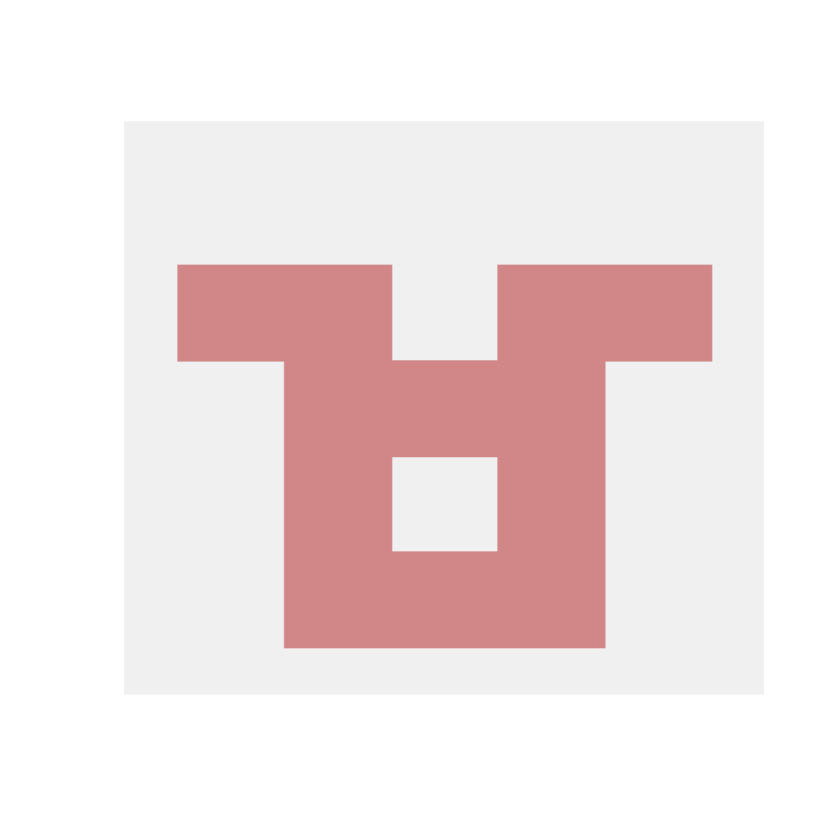

In [41]:
jj <- readPNG("avatar.png",native=TRUE)
plot(0:1,0:1,type="n",ann=FALSE,axes=FALSE)
rasterImage(jj,0,0,1,1)

## Making GitHub Avatars

Just for fun, what if we wanted to make our own customized GitHub-style avatars? It turns out it is only a few lines of code!

In [123]:
avatar_ID <- 11

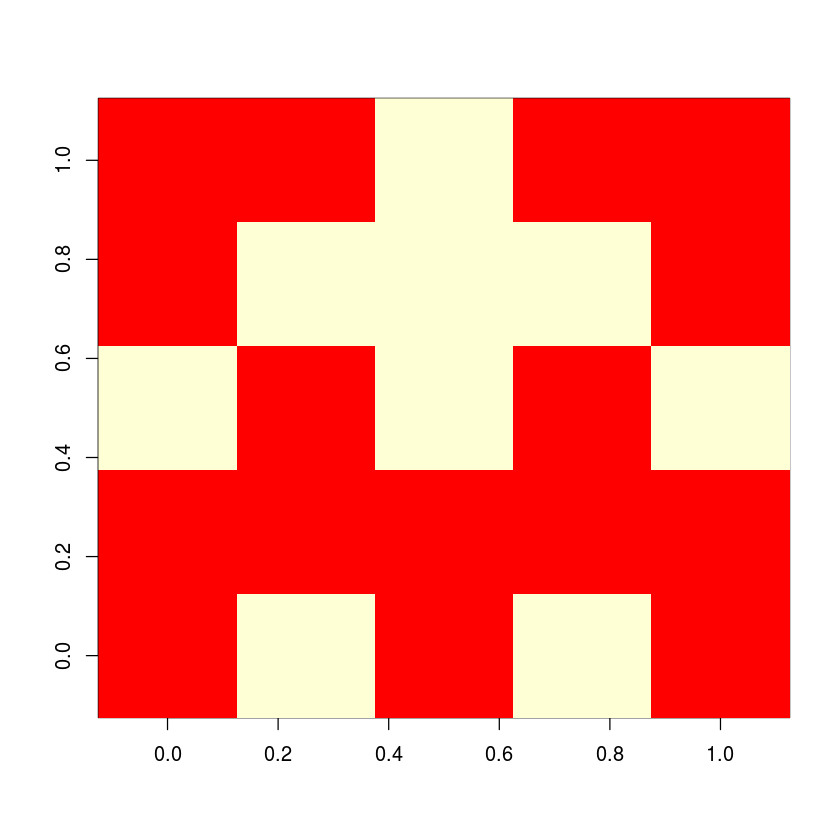

In [124]:
### the random part is a 3x5 matrix
### this code will just repeat columns 1 and 2 in columns 4 and 5
### we'll fix that later
set.seed(avatar_ID)
g <- matrix(sample(0:1, 15, replace=T),nrow=5,ncol=5)

# we need to reflect this over the third column
g[,c(4,5)]<- g[,c(5,4)]

# if we don't transpose it will show up sideways
image(t(g))

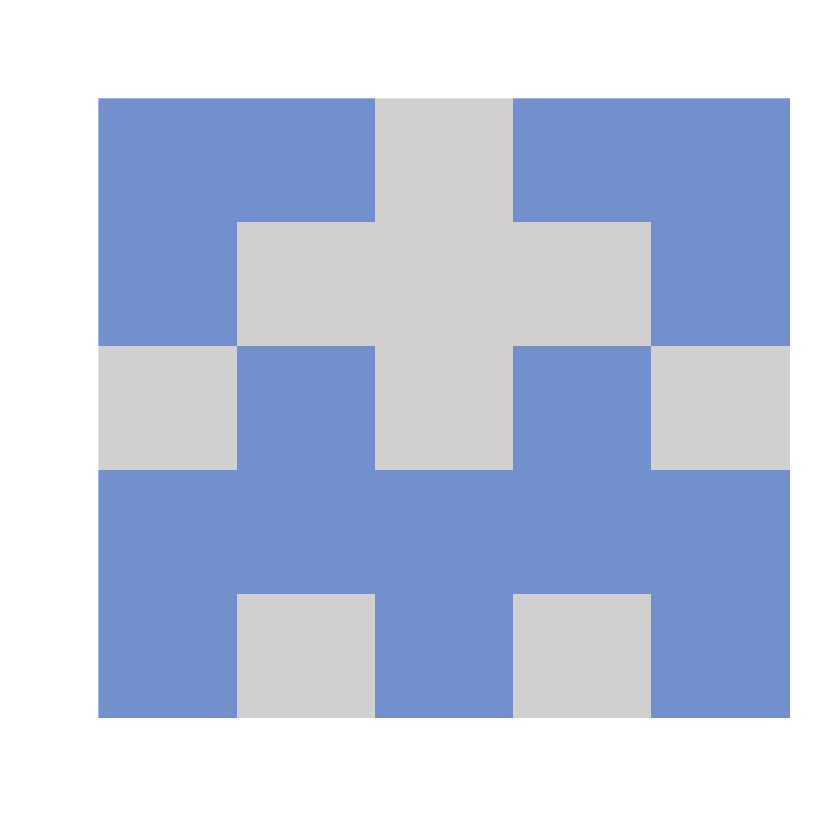

In [125]:
HTML1 <- "#728FCE"
HTML2 <- "#D1D0CE"

cols <- c(HTML1, HTML2)
image(t(g),col=cols, axes=F)

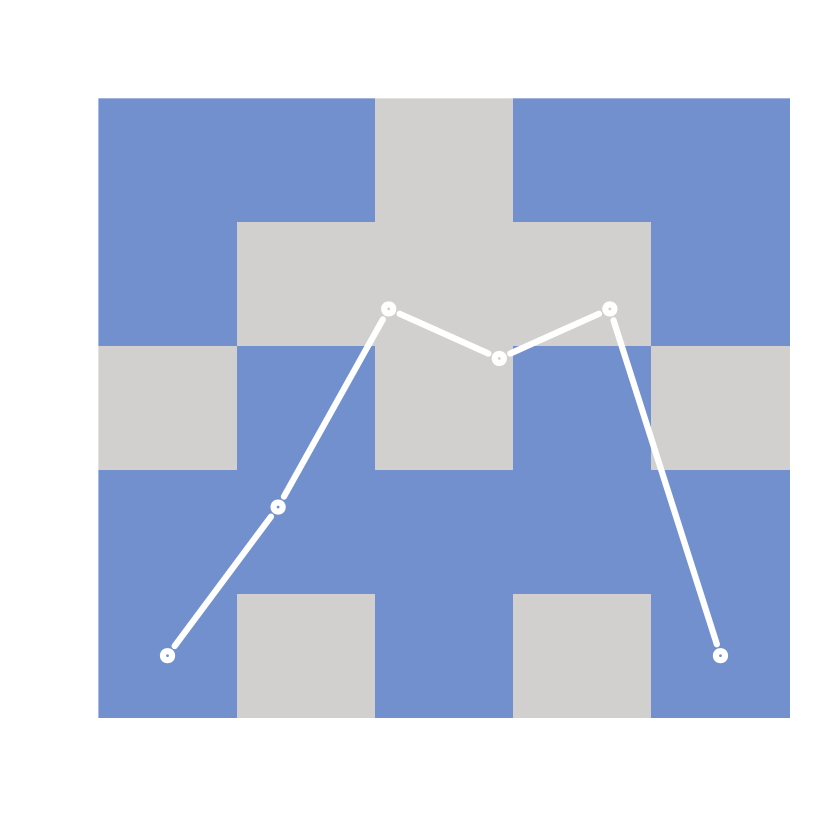

In [126]:
image(t(g),col=cols,axes=F)
lines(c(0, .2, .4, .6, .8, 1.0), c(0, .3, .7, .6, .7, 0), type="b", lwd=5, col="white")